# Deep Learning with PyTorch Step-by-Step: A Beginner's Guide

# Chapter 0

In [206]:
%reload_ext autoreload
%autoreload 2

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [208]:
from plots.chapter0 import figure1, figure2, figure3, figure4, figure5, figure6, figure7, figure8, figure9
from plots.chapter0 import figure10, figure14, figure15, figure17, figure18

# Visualizing Gradient Descent

## Model

$$
\Large y = b + w x + \epsilon
$$

## Data Generation

### Synthetic Data Generation

In [209]:
true_b = 1
true_w = 2
N = 100

# Data Generation
rng = np.random.default_rng(54321)
x = rng.random(N)
epsilon = .1 * rng.standard_normal(N)
y = true_b + true_w * x + epsilon

### Train-Validation-Test Split

In [210]:
# Shuffle the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Use first 80 random indices for train
train_idx = idx[:int(N * .8)]
# Use the ramaining indices for validation
val_idx = idx[int(N * .8):]

# Generate train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

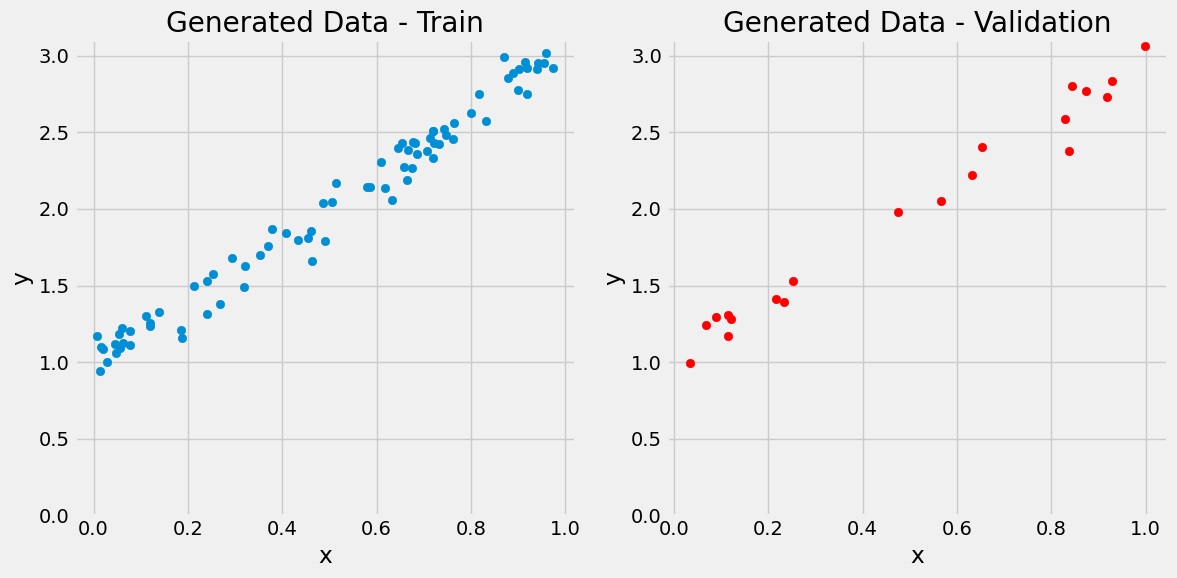

In [211]:
figure1(x_train, y_train, x_val, y_val)

## Step 0: Random Initialization

In [212]:
# Step 0 - Initialize parameters "b" and "w" randomly
rng = np.random.default_rng(54321)
b = rng.standard_normal(1)
w = rng.standard_normal(1)

print(b, w)

[0.82483768] [0.40749068]


## Step 1: Compute Model's Predictions

In [213]:
# Step 1 - Compute our model's predicted output - forward pass
yhat = b + w * x_train

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

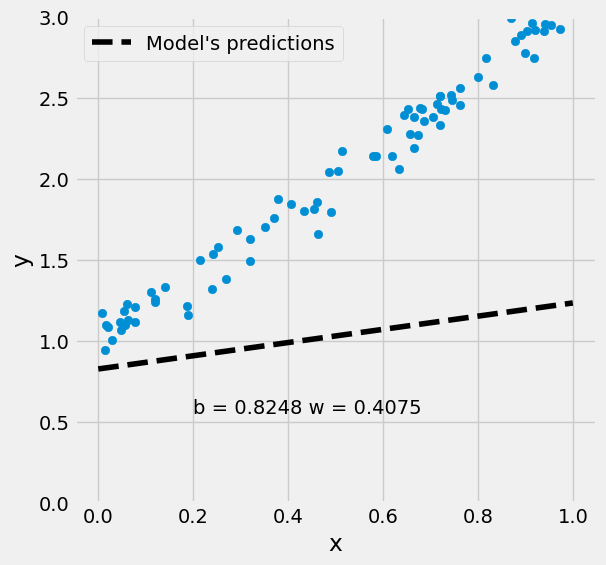

In [214]:
figure2(x_train, y_train, b, w)

## Step 2: Compute the Loss

$$
\Large \text{error}_i = \hat{y_i} - y_i
$$

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

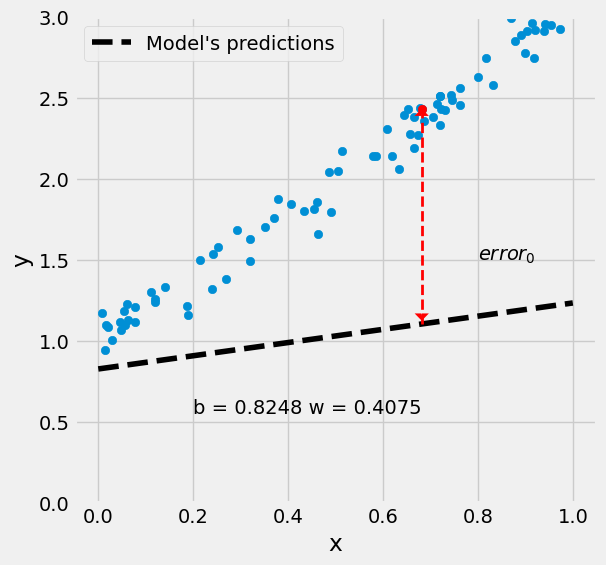

In [215]:
figure3(x_train, y_train, b, w)

$$
\Large
\begin{aligned}
\text{MSE} &= \frac{1}{n} \sum_{i=1}^n{\text{error}_i}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(b + w x_i - y_i)}^2
\end{aligned}
$$

In [216]:
# Step 2 - Compute the loss
# We are using ALL data points, so this is BATCH gradient descent. 
# How wrong is our model? That's the error!
error = yhat - y_train

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

1.2273264243462407


### Loss Surface

In [217]:
# Reminder:
# true_b = 1
# true_w = 2

# We have to split the ranges in 100 evenly spaced intervals each.
# Sure, we’re somewhat cheating here, since we know the true values of b and w, so we can 
# choose the perfect ranges for the parameters. But it is for educational purposes only.
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3, true_w + 3, 101)
# meshgrid is a handy function that generates a grid of b and w values for all combinations
bs, ws = np.meshgrid(b_range, w_range)
bs.shape, ws.shape

((101, 101), (101, 101))

In [218]:
bs

array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       ...,
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]])

In [219]:
ws

array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-0.94, -0.94, -0.94, ..., -0.94, -0.94, -0.94],
       [-0.88, -0.88, -0.88, ..., -0.88, -0.88, -0.88],
       ...,
       [ 4.88,  4.88,  4.88, ...,  4.88,  4.88,  4.88],
       [ 4.94,  4.94,  4.94, ...,  4.94,  4.94,  4.94],
       [ 5.  ,  5.  ,  5.  , ...,  5.  ,  5.  ,  5.  ]])

In [220]:
sample_x = x_train[0]
sample_yhat = bs + ws * sample_x
sample_yhat.shape

(101, 101)

In [221]:
all_predictions = np.apply_along_axis(
    func1d=lambda x: bs + ws * x,
    axis=1,
    arr=x_train.reshape(-1, 1),
)
all_predictions.shape

(80, 101, 101)

In [222]:
all_labels = y_train.reshape(-1, 1, 1)
all_labels.shape

(80, 1, 1)

In [223]:
all_errors = all_predictions - all_labels
all_errors.shape

(80, 101, 101)

In [224]:
all_losses = (all_errors ** 2).mean(axis=0)
all_losses.shape

(101, 101)

(<Figure size 1200x600 with 2 Axes>,
 (<Axes3D: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
  <Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>))

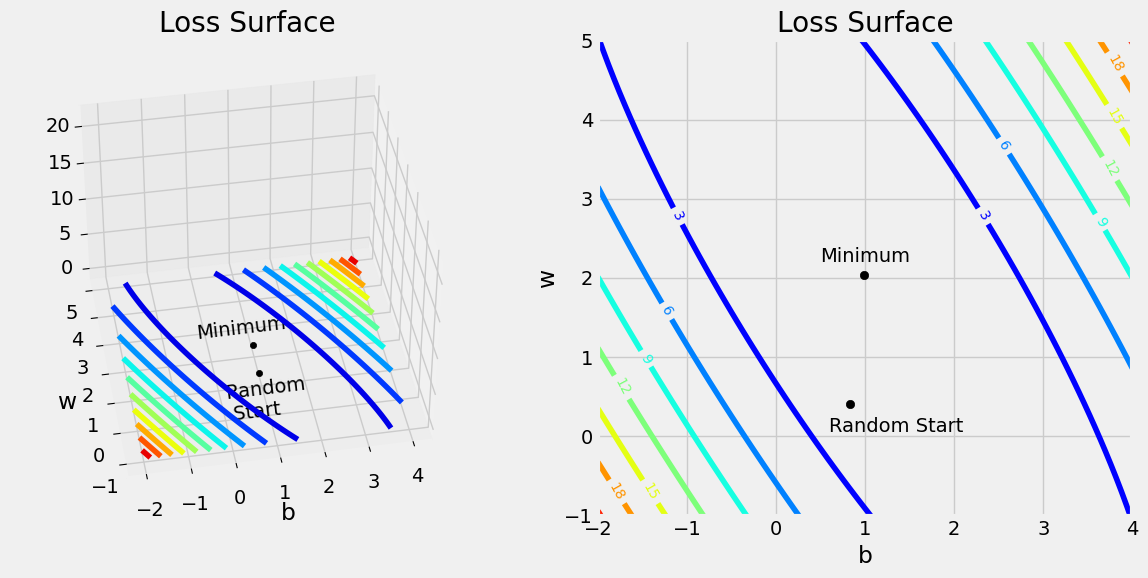

In [225]:
figure4(x_train, y_train, b, w, bs, ws, all_losses)

### Cross Sections

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Fixed: b = 0.82'}, xlabel='w', ylabel='Loss'>],
       dtype=object))

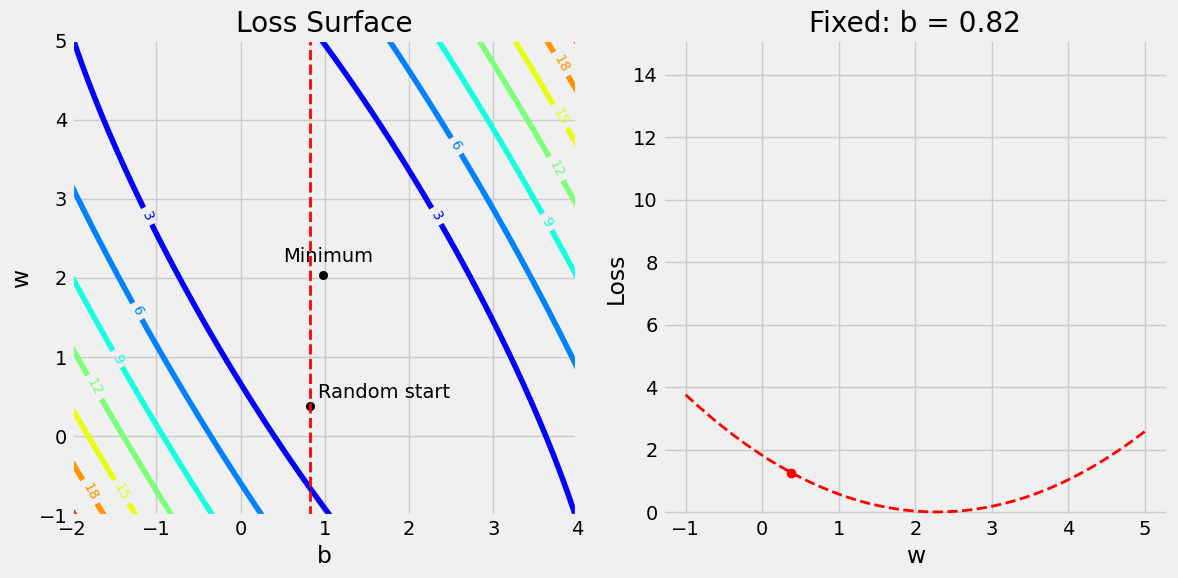

In [226]:
figure5(x_train, y_train, b, w, bs, ws, all_losses)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Fixed: w = 0.38'}, xlabel='b', ylabel='Loss'>],
       dtype=object))

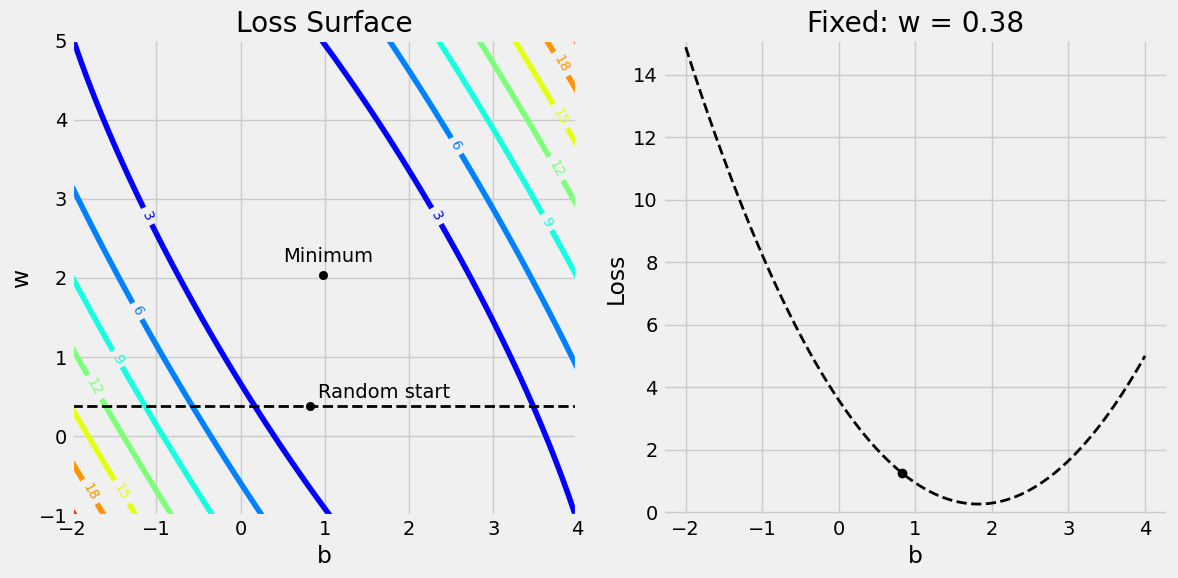

In [227]:
figure6(x_train, y_train, b, w, bs, ws, all_losses)

## Step 3: Compute the Gradients

$$
\Large
\begin{aligned}
\frac{\partial{\text{MSE}}}{\partial{b}} = \frac{\partial{MSE}}{\partial{\hat{y_i}}}\frac{\partial{\hat{y_i}}}{\partial{b}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x_i - y_i)}
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}
\\
\frac{\partial{\text{MSE}}}{\partial{w}} = \frac{\partial{MSE}}{\partial{\hat{y_i}}}\frac{\partial{\hat{y_i}}}{\partial{w}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x_i - y_i)x_i}
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{x_i(\hat{y_i} - y_i)}
\end{aligned}
$$

In [228]:
# Step 3 - Compute gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-1.9676135034072861 -1.2999190230834634


### Visualizing the Gradients

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.82'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = 0.38'}, xlabel='b'>],
       dtype=object))

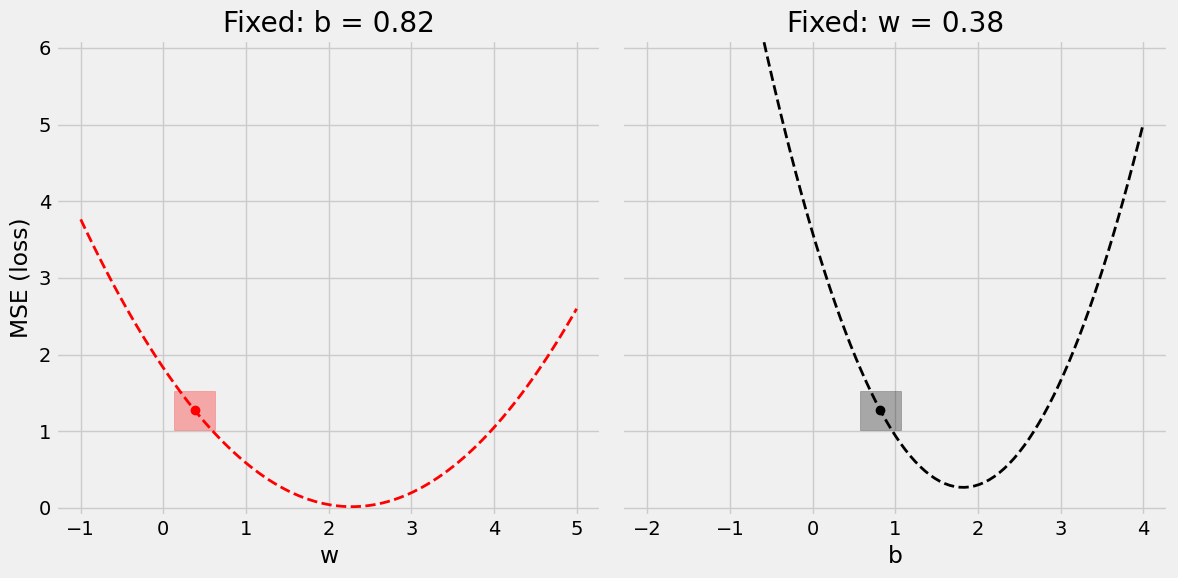

In [229]:
figure7(b, w, bs, ws, all_losses)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.82'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = 0.38'}, xlabel='b', ylabel='MSE (loss)'>],
       dtype=object))

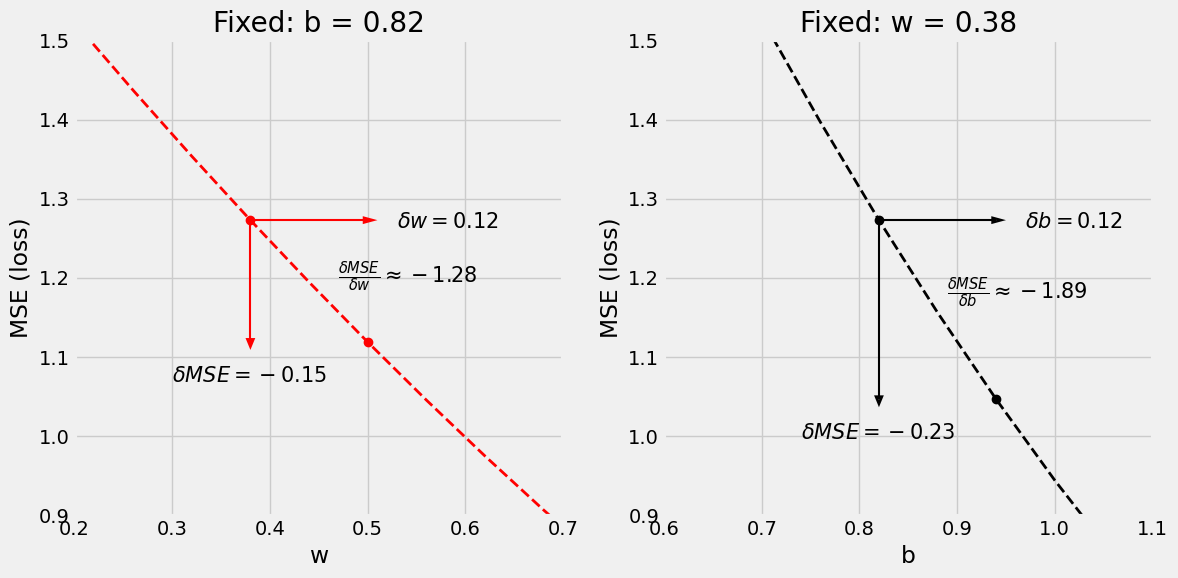

In [230]:
figure8(b, w, bs, ws, all_losses)

### Backpropagation

## Step 4: Update the Parameters

$$
\Large
\begin{aligned}
b &= b - \eta \frac{\partial{\text{MSE}}}{\partial{b}}
\\
w &= w - \eta \frac{\partial{\text{MSE}}}{\partial{w}}
\end{aligned}
$$

In [231]:
# Set learning rate - this is "eta"
lr = .1
print(b, w)

# Step 4 - Update parameters using gradients and the learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.82483768] [0.40749068]
[1.02159903] [0.53748258]


(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

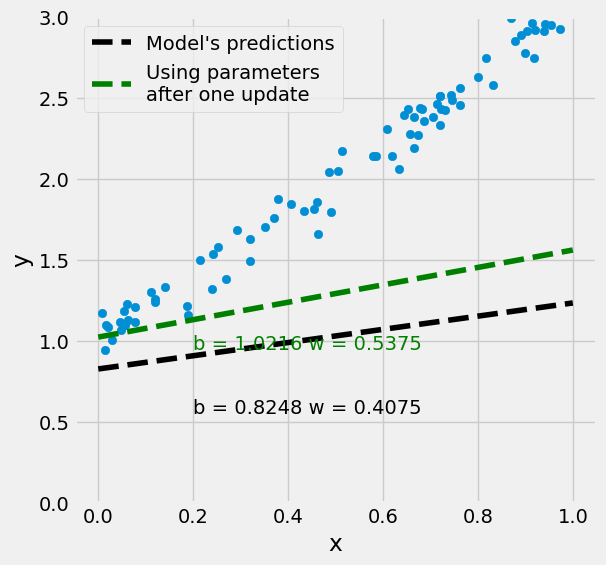

In [232]:
figure9(x_train, y_train, b, w)

### Learning Rate

In [233]:
manual_grad_b = -1.88
manual_grad_w = -1.30

rng = np.random.default_rng(54321)
b_initial = rng.standard_normal(1)
w_initial = rng.standard_normal(1)

#### Low Learning Rate

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.82'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = 0.38'}, xlabel='b', ylabel='MSE (loss)'>],
       dtype=object))

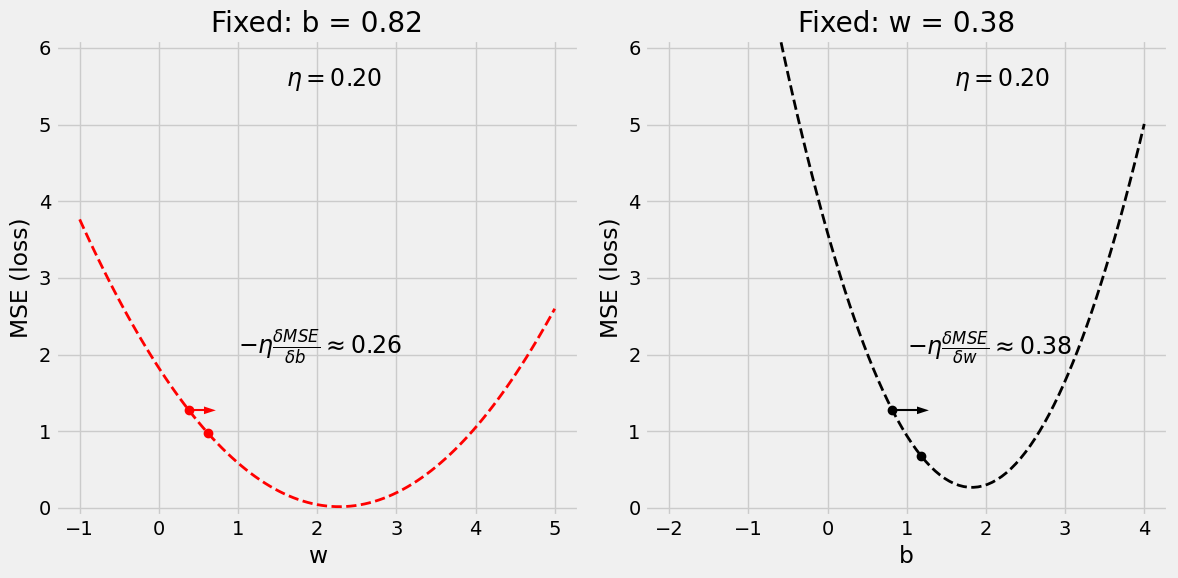

In [234]:
# Learning rate
lr = .2

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

#### High Learning Rate

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.82'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = 0.38'}, xlabel='b', ylabel='MSE (loss)'>],
       dtype=object))

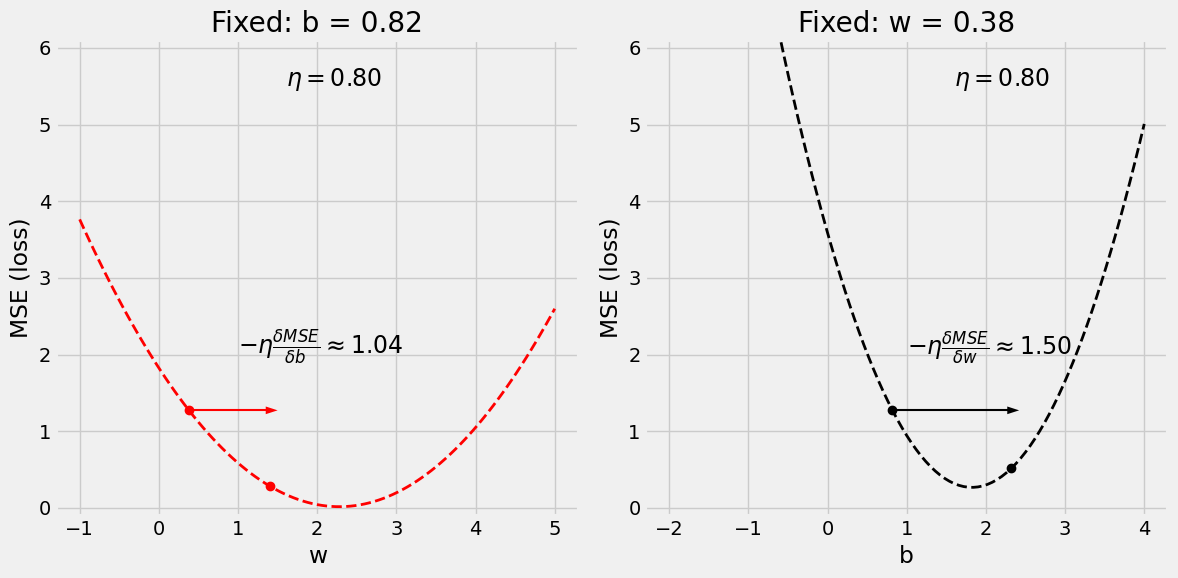

In [235]:
# Learning rate
lr = .8

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

#### Very High Learning Rate

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.82'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = 0.38'}, xlabel='b', ylabel='MSE (loss)'>],
       dtype=object))

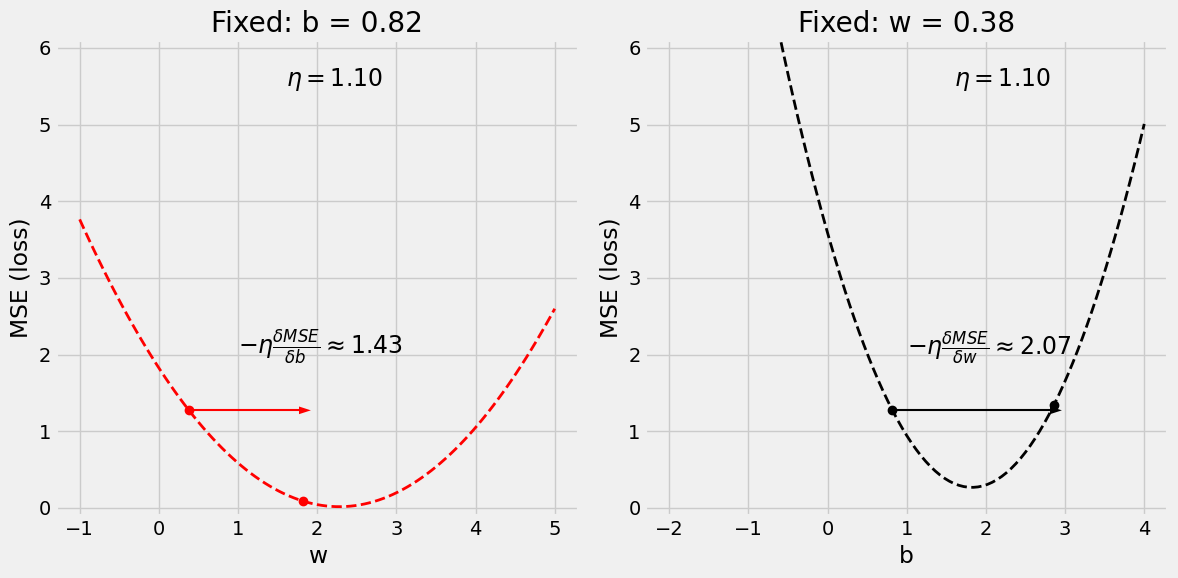

In [236]:
# Learning rate
lr = 1.1

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

#### "Bad" Feature

In [237]:
true_b = 1
true_w = 2
N = 100

# Data Generation
rng = np.random.default_rng(54321)

# We divide w by 10
bad_w = true_w / 10
# And multiply x by 10
bad_x = rng.random(N) * 10

epsilon = .1 * rng.standard_normal(N)

# So, the net effect on y is zero - it is still the same as before
y = true_b + bad_w * bad_x + epsilon

In [238]:
# Generate train and validation sets
# Use the same train_idx and val_idx as before, but apply to bad_x
bad_x_train, y_train = bad_x[train_idx], y[train_idx]
bad_x_val, y_val = bad_x[val_idx], y[val_idx]

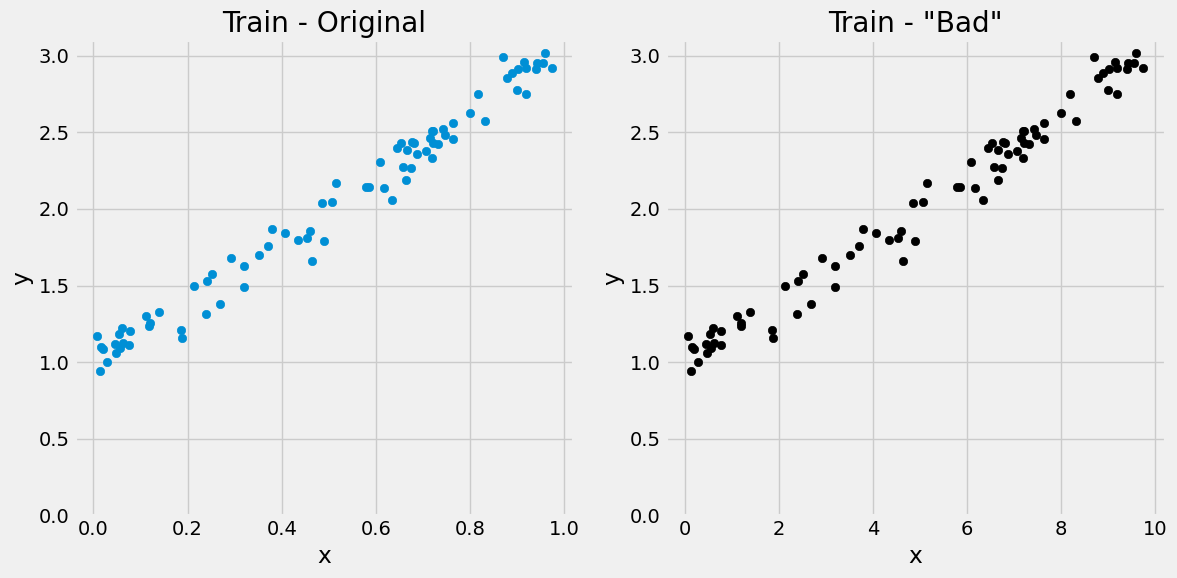

In [239]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(x_train, y_train)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3.1])
ax[0].set_title('Train - Original')
ax[1].scatter(bad_x_train, y_train, c='k')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3.1])
ax[1].set_title('Train - "Bad"')
fig.tight_layout()

In [240]:
# The ranges CHANGED because we are centering at the new minimum, using "bad" data
bad_b_range = np.linspace(true_b - 3, true_b + 3, 101)
bad_w_range = np.linspace(true_w - 3 - 2, true_w + 3 - 2, 101)
bad_bs, bad_ws = np.meshgrid(bad_b_range, bad_w_range)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface - Before'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Loss Surface - After'}, xlabel='b', ylabel='w'>],
       dtype=object))

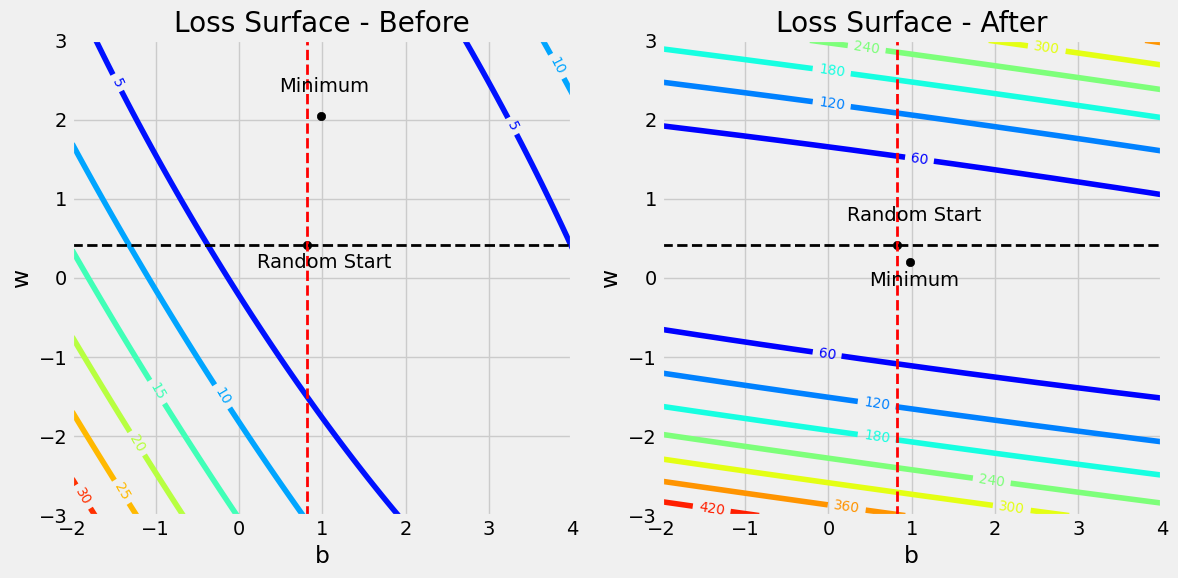

In [241]:
figure14(x_train, y_train, b_initial, w_initial, bad_bs, bad_ws, bad_x_train)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.82'}, xlabel='w', ylabel='Loss'>,
        <Axes: title={'center': 'Fixed: w = 0.42'}, xlabel='b', ylabel='Loss'>],
       dtype=object))

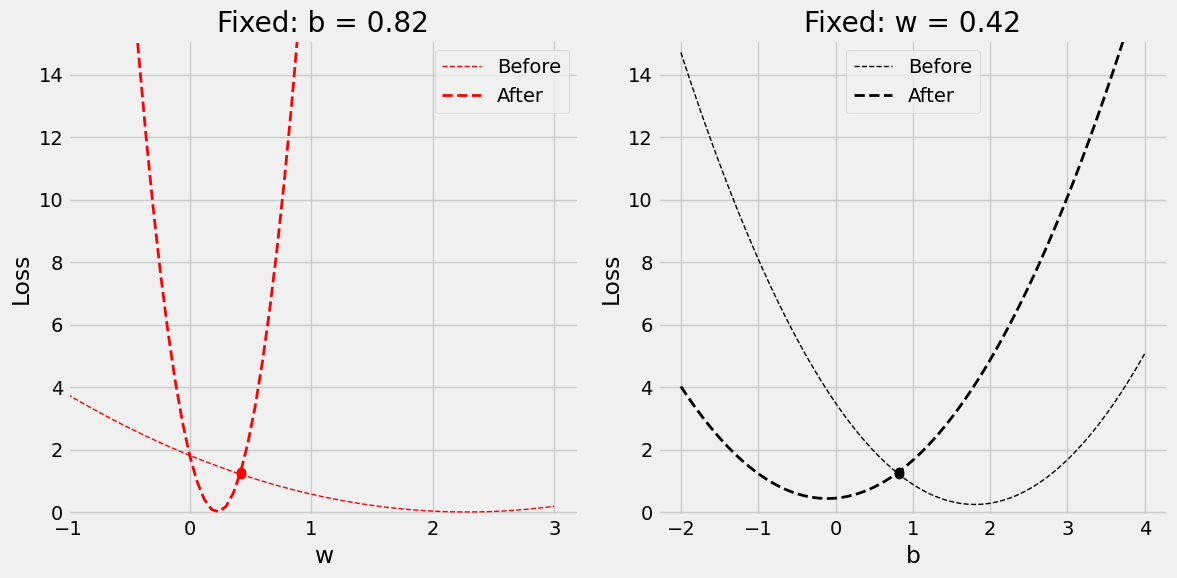

In [242]:
figure15(x_train, y_train, b_initial, w_initial, bad_bs, bad_ws, bad_x_train)

#### Scaling / Standardizing / Normalizing

$$
\Large
\overline{X} = \frac{1}{N} \sum_{i=1}^N{x_i}
\\
\sigma{X} = \sqrt{\frac{1}{N} \sum_{i=1}^N{(x_i - \overline{X})^2}}
\\
\text{scaled } x_i = \frac{x_i - \overline{X}}{\sigma{X}}
$$

In [243]:
scaler = StandardScaler(with_mean=True, with_std=True)
# We use the TRAIN set ONLY to fit the scaler
scaler.fit(x_train.reshape(-1, 1))

# Now we can use the already fit scaler to TRANSFORM both TRAIN and VALIDATION sets
scaled_x_train = scaler.transform(x_train.reshape(-1, 1))
scaled_x_val = scaler.transform(x_val.reshape(-1, 1))

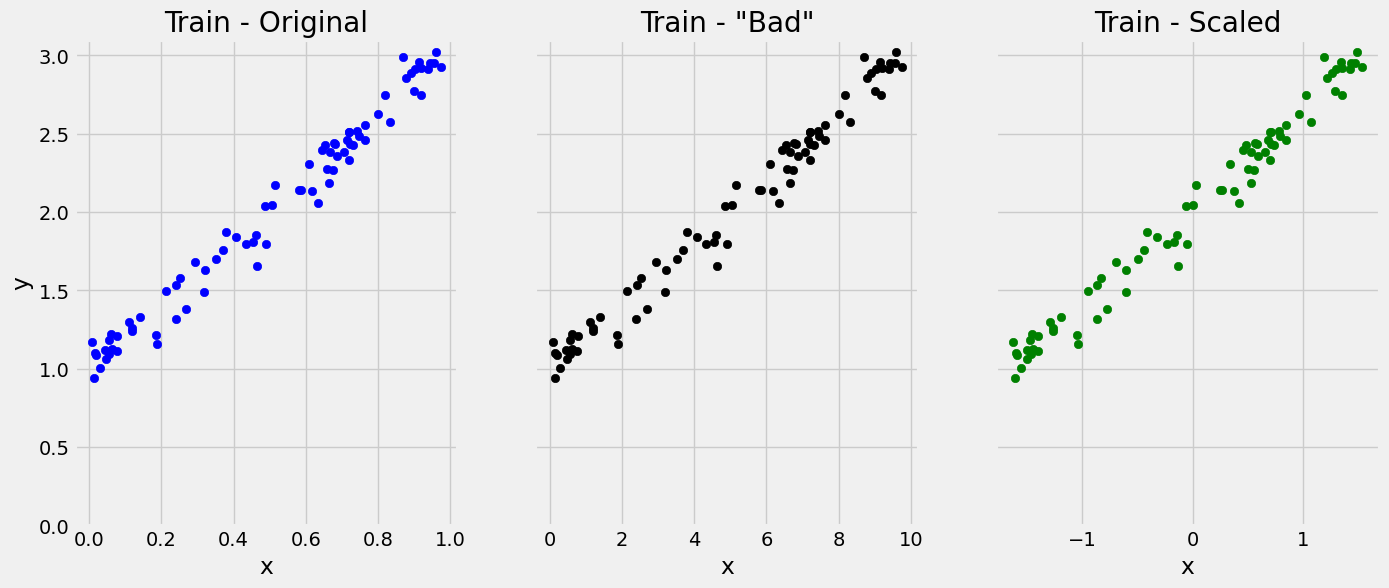

In [244]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs[0].scatter(x_train, y_train, c='b')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_ylim([0, 3.1])
axs[0].set_title('Train - Original')
axs[1].scatter(bad_x_train, y_train, c='k')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_ylim([0, 3.1])
axs[1].set_title('Train - "Bad"')
axs[1].label_outer()
axs[2].scatter(scaled_x_train, y_train, c='g')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_ylim([0, 3.1])
axs[2].set_title('Train - Scaled')
axs[2].label_outer()

In [245]:
# The ranges CHANGED AGAIN because we are centering at the new minimum, using "scaled" data
scaled_b_range = np.linspace(true_b - 3 + 1, true_b + 3 + 1, 101)
scaled_w_range = np.linspace(true_w - 3 - 1, true_w + 3 - 1, 101)
scaled_bs, scaled_ws = np.meshgrid(scaled_b_range, scaled_w_range)

(<Figure size 1500x600 with 3 Axes>,
 array([<Axes: title={'center': 'Loss Surface - Original'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Loss Surface - Bad'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Loss Surface - Scaled'}, xlabel='b', ylabel='w'>],
       dtype=object))

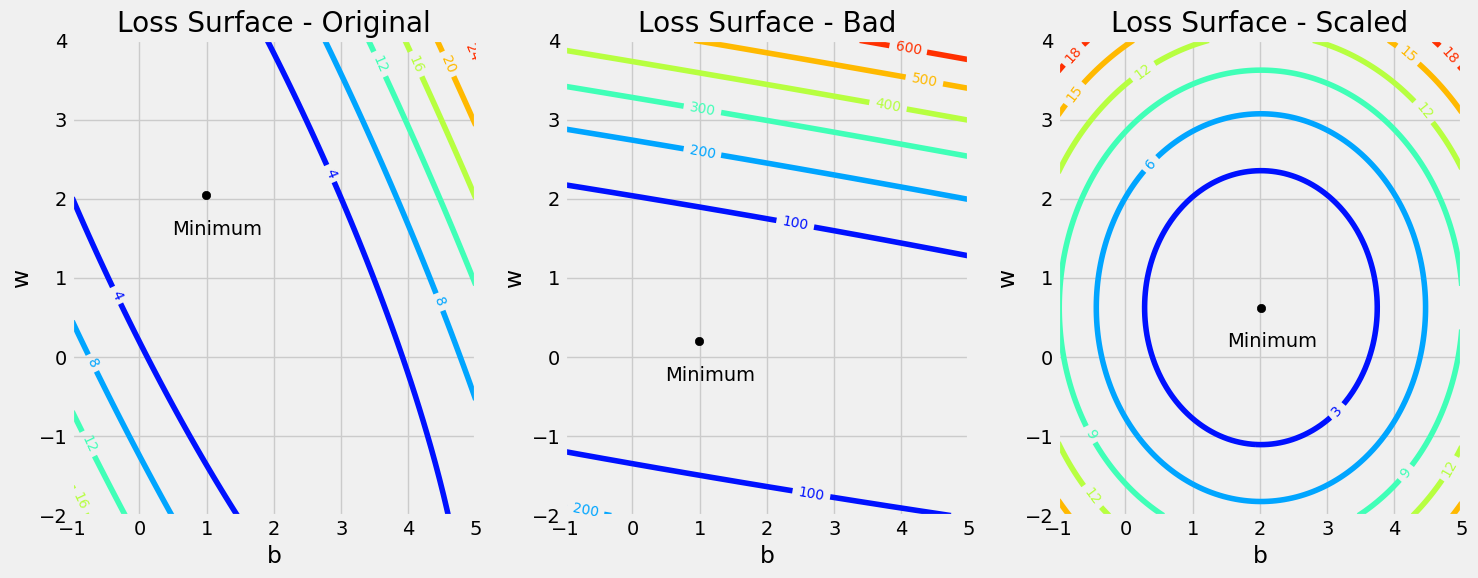

In [246]:
figure17(x_train, y_train, scaled_bs, scaled_ws, bad_x_train, scaled_x_train)

## Step 5: Rinse and Repeat!

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

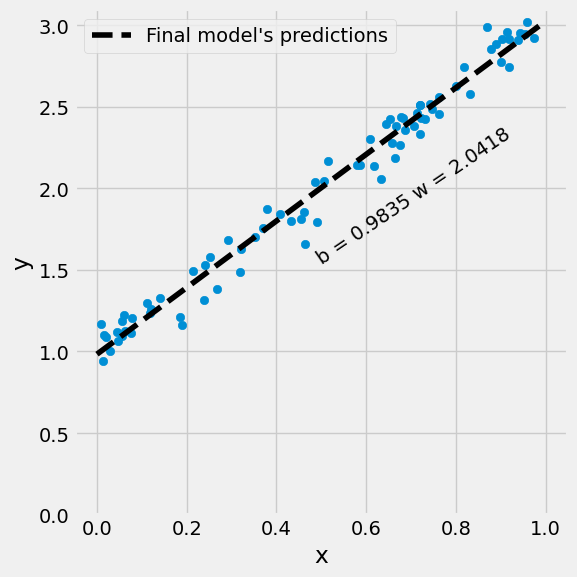

In [247]:
figure18(x_train, y_train)

### The Path of Gradient Descent

Even though the plots are important to illustrate the paths, the corresponding code is beyond the scope of this chapter.

![](images/paths.png)